## 데이터 다운로드
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

### 라이브러리 불러오기

In [1]:
# 교재 410 페이지
# 신용카드 채무 불이행 고객 예측

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# read_excel을 사용하기 위한 라이브러리 다운
!pip install xlrd

In [2]:
df = pd.read_excel('./kaggle_data/default+of+credit+card+clients/default of credit card clients.xls'
                    , header = 1
                    #, sheet_name='Data'
                    )

print(f'''
shape : {df.shape}
info : {df.info()}
''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [3]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [4]:
df.rename(columns = {'PAY_0' : 'PAY_1'
                     , 'default payment next month' : 'default'}
        , inplace = True
        )

y_target = df['default']
X_features = df.drop('default', axis = 1)

<AxesSubplot:>

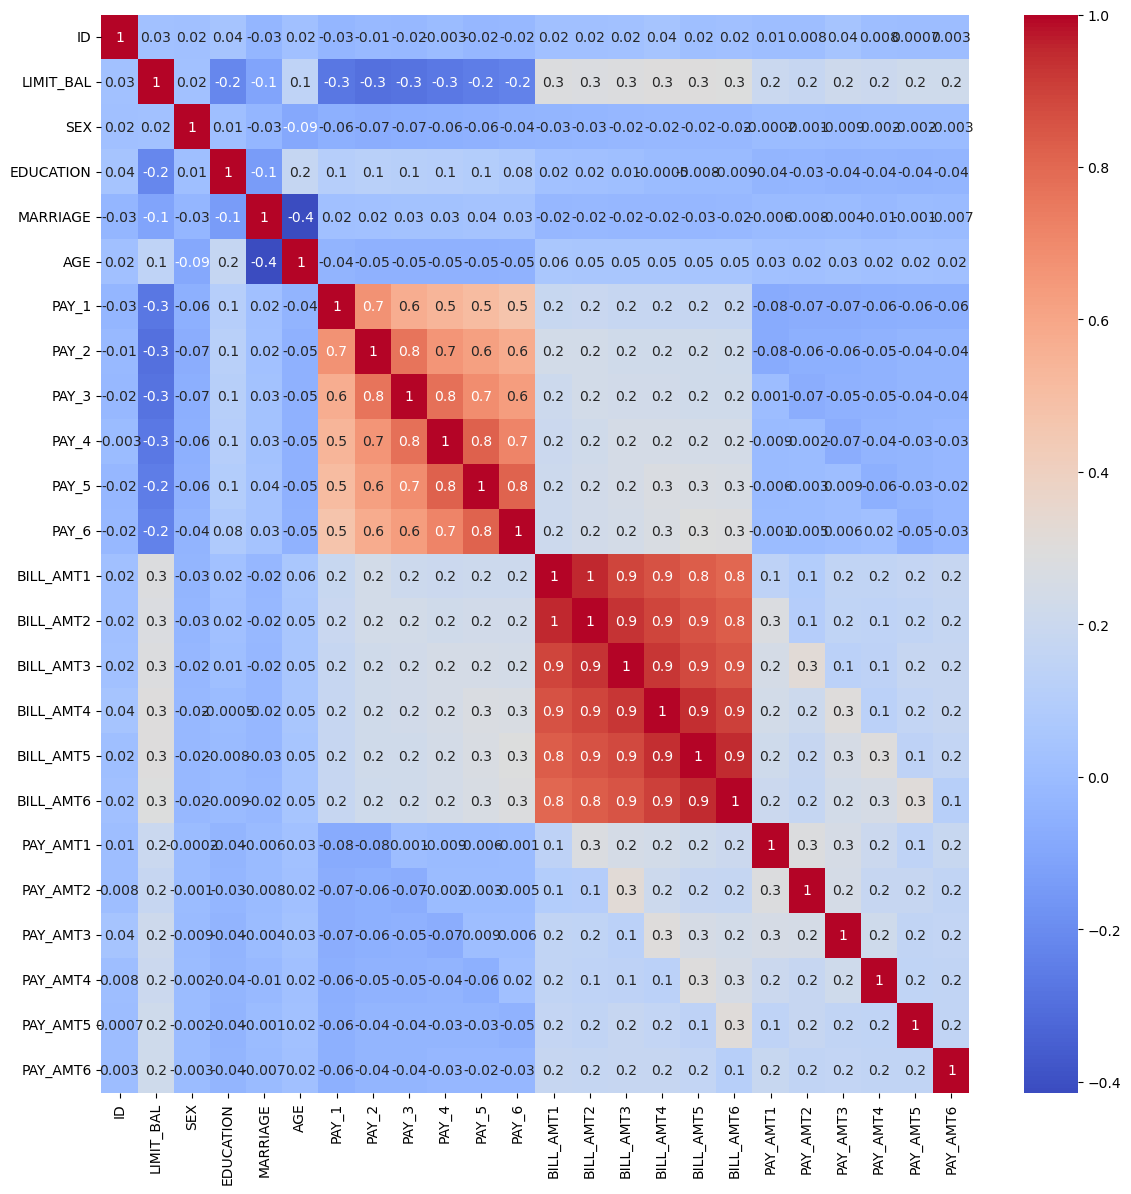

In [5]:
corr = X_features.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr
            , annot = True
            , cmap = 'coolwarm'
            , fmt = '.1g')

In [10]:
# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]

# 2개의 PCA 속성을 가진 PCA 객체 생성, explained_variance_ratiio 계산을 위해 fit 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)
print(f'''
PCA Component별 변동성
{pca.explained_variance_ratio_}
''')


PCA Component별 변동성
[0.90555253 0.0509867 ]



In [12]:
rcf = RandomForestClassifier(n_estimators=300
                             , random_state=156)
scores = cross_val_score(rcf
                         , X_features
                         , y_target
                         , scoring = 'accuracy'
                         , cv = 5
                         )
print(f'CV = 5인 경우의 개별 Fold세트별 정확도 : {scores}')
print(f'평균 정확도 : {np.mean(scores):.4f}')

CV = 5인 경우의 개별 Fold세트별 정확도 : [0.80483333 0.81016667 0.82033333 0.831      0.8185    ]
평균 정확도 : 0.8170


In [13]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf
                             ,df_pca
                             , y_target
                             , scoring = 'accuracy'
                             , cv = 5
                             )

print(f'CV = 5인 경우의 개별 Fold세트별 정확도 : {scores_pca}')
print(f'평균 정확도 : {np.mean(scores_pca):.4f}')


CV = 3인 경우의 개별 Fold세트별 정확도 : [0.78583333 0.794      0.79633333 0.80883333 0.79433333]
평균 정확도 : 0.7959


### 마무리